In [59]:
from scipy.stats import norm, binom
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [48]:
# codigo do Joel Gruss em: https://github.com/joelgrus/data-science-from-scratch/blob/master/scratch/probability.py

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z


def normal_upper_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)
    
def normal_lower_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds 
    that contain the specified probability"""
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound


# 1000 lançamentos
n, p = 1000, 0.5
mean = binom.mean(n, p) # n * p
std_deviation = binom.std(n, p) # sqrt(n * p * (1-p))

l, h = normal_two_sided_bounds(0.95, mu=mean, sigma=std_deviation)
print(l, h)


469.01026640487555 530.9897335951244


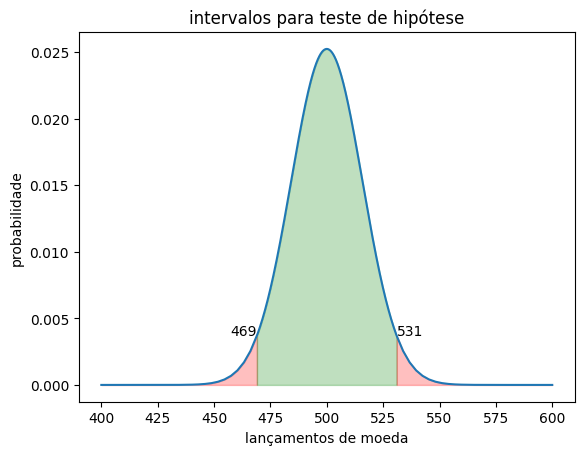

cdf_469=0.025
sf_531=0.025
tail_zone_left=469
tail_zone_right=531


In [106]:
# modificando o codigo do joel
# usando funções do scipy para facilitar o trabalho: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

def bounds(p, mu, sigma):
    tail_p = (1-p) / 2
    # print(tail_p)

    # lower_p = tail_p
    # higher_p = 1-tail_p

    # pensar no grafico da pdf distribuição normal
    # a lower bound seria a área abaixo do grafico no limite da esquerda
    # a upper_bound seria a área a abaixo no grafico no limite da direita
    x_low = norm.ppf(tail_p, loc=mu, scale=sigma) # P(X <= x) = tail_p
    x_high = norm.isf(tail_p, loc=mu, scale=sigma)  # P(x >= x) = tail_p

    return x_low, x_high


# 1000 lançamentos
n, p = 1000, 0.5
mean = binom.mean(n, p) # n * p
std_deviation = binom.std(n, p) # sqrt(n * p * (1-p))

q = 0.95
x_low, x_high = bounds(q, mu=mean, sigma=std_deviation)
# print(f"{x_low=}")
# print(f"{x_high=}")

n = 1000
tail = (1-q) / 2
n_inside = round(1000 * q)
n_outside = round(1000 * tail)

# print(f"{n_inside=}")
# print(f"{n_outside=}")

vec_low_outside = np.linspace(400, x_low, n_outside)
y1 = norm.pdf(vec_low_outside, loc=mean, scale=std_deviation)

vec_inside = np.linspace(x_low, x_high, n_inside)
y2 = norm.pdf(vec_inside, loc=mean, scale=std_deviation)

vec_high_outside = np.linspace(x_high, 600, n_outside)
y3 = norm.pdf(vec_high_outside, loc=mean, scale=std_deviation)

x = np.concatenate((vec_low_outside, vec_inside, vec_high_outside))

# print(f"{vec_low_outside=}")
# print(f"{vec_inside=}")
# print(f"{vec_high_outside=}")


# x = np.linspace(400, 600, 1000)
y = norm.pdf(x, loc=mean, scale=std_deviation)
plt.plot(x, y)
plt.fill_between(vec_low_outside, y1, color="red", alpha=0.25)
plt.fill_between(vec_inside, y2, color="green", alpha=0.25)
plt.fill_between(vec_high_outside, y3, color="red", alpha=0.25)

y_x_low = norm.pdf(x_low, loc=mean, scale=std_deviation)
y_x_high = norm.pdf(x_high, loc=mean, scale=std_deviation)

# print(f"{y_x_low=}")
# print(f"{y_x_high=}")

plt.title("intervalos para teste de hipótese")

plt.text(x_low-12, y_x_low, f"{round(x_low)}")
plt.text(x_high, y_x_high, f"{round(x_high)}")

plt.xlabel("lançamentos de moeda")
plt.ylabel("probabilidade")


plt.show()


# explicando as funções do scipy
# cdf: P(X <= x) e sf: (P X >= x)
# cdf e sf (entrada "x"  e saída: probabilidade)

cdf_469 = round(norm.cdf(469, loc=mean, scale=std_deviation), 3)
sf_531 = round(norm.sf(531, loc=mean, scale=std_deviation), 3)
print(f"{cdf_469=}")
print(f"{sf_531=}")

# ppf: P(X <= x) = p / isf: P(X >= x) = p
# entrada: probabilidade / saida: "x" que da a probabilidade

p1 = 0.95
tail_zone = (1 - p1) / 2 # as tail_zone são as zonas extremas do gráfico


tail_zone_left = round(norm.ppf(tail_zone, loc=mean, scale=std_deviation))
tail_zone_right = round(norm.isf(tail_zone, loc=mean, scale=std_deviation))

print(f"{tail_zone_left=}")
print(f"{tail_zone_right=}")

